In [1]:
!pwd


/ekaterina/work/src/lca/lca/notebooks


In [3]:
'''
Assign the log file name.
'''

import sys
sys.path.append('/ekaterina/work/src/lca/lca')

from tools import *


# # Beluga

# config_path = '/ekaterina/work/src/lca/lca/configs/config_beluga.yaml'
# log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/beluga_kde_0.98_20241108_125221.log'
# node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/beluga_kde_0.98/node2uuid_file.json'


# #Giraffe

# config_path = '/ekaterina/work/src/lca/lca/configs/config_giraffe.yaml'
# log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/giraffe_smoothing_0.98_20241107_211535.log'
# node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/giraffe_smoothing_0.98/node2uuid_file.json'


# #Grevy's zebra

# config_path = '/ekaterina/work/src/lca/lca/configs/config_grevyszebra.yaml'
# log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/grevyszebra_kde_0.98_20241106_164351.log'
# node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/grevyszebra_kde_0.98/node2uuid_file.json'


# #Plains zebra

# config_path = '/ekaterina/work/src/lca/lca/configs/config_plainszebra.yaml'
# log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/plainszebra_fixed2_1.0_20241107_195511.log'
# node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/plainszebra_fixed2_1.0/node2uuid_file.json'


 #Whale sharks

config_path = '/ekaterina/work/src/lca/lca/configs/config_whaleshark.yaml'
# log_fn = '/ekaterina/work/src/lca/lca/tmp/logs/plainszebra_fixed2_1.0_20241107_195511.log'
# node2uuid_path = '/ekaterina/work/src/lca/lca/tmp/plainszebra_fixed2_1.0/node2uuid_file.json'






In [4]:
from preprocess import load_to_df
config = get_config(config_path)
annotation_file = config['data']['annotation_file']
images_dir = config['data']['images_dir']

data_params = config['data']
species = config['species']

embeddings, uuids = load_pickle(data_params['embedding_file'])

df = load_to_df(annotation_file, format='old')

df['image_path'] = images_dir + '/' + df['file_name']


uuid_to_imagepath = df.set_index('uuid_x')['image_path'].to_dict()
uuid_to_name = df.set_index('uuid_x')['name_viewpoint'].to_dict()  
uuid_to_bbox = df.set_index('uuid_x')['bbox'].to_dict()  





Merging on image uuid
** Loaded /ekaterina/work/data/whaleshark_full/whaleshark.coco/annotations/whaleshark_singletons_flipped.json **
      Found 997 annotations


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image


# def find_similar_pairs(embeddings, uuids, uuid_to_name, similarity_threshold=0.5):
#     """
#     Find pairs of images from the same animal with high similarity scores.
    
#     Parameters:
#     - embeddings: numpy array of image embeddings
#     - uuids: list of unique identifiers corresponding to embeddings
#     - uuid_to_name: dictionary mapping UUIDs to animal names
#     - similarity_threshold: minimum cosine similarity to consider a pair
    
#     Returns:
#     - similar_pairs: list of tuples (uuid1, uuid2, similarity_score, animal_name)
#     """
#     # Compute cosine similarity matrix
#     similarity_matrix = cosine_similarity(embeddings)
#     similarity_matrix = np.clip(similarity_matrix, -1, 1)

#     current_min = similarity_matrix.min()
#     current_max = similarity_matrix.max()
#     similarity_matrix = 2 * (similarity_matrix - current_min) / (current_max - current_min) - 1



#     print(f'Max similarity: {similarity_matrix.max()}, min similarity: {similarity_matrix.min()}')
    
#     # Find similar pairs
#     similar_pairs = []
#     n = len(uuids)
    
#     for i in range(n):
#         for j in range(i+1, n):
#             # Check if from same animal
#             if uuid_to_name[uuids[i]] == uuid_to_name[uuids[j]]:
#                 similarity = similarity_matrix[i, j]
                
#                 # Check if similarity is above threshold
#                 if similarity >= similarity_threshold:
#                     similar_pairs.append((
#                         uuids[i], 
#                         uuids[j], 
#                         similarity, 
#                         uuid_to_name[uuids[i]]
#                     ))
    
#     # Sort pairs by similarity score in descending order
#     similar_pairs.sort(key=lambda x: x[2], reverse=True)
    
#     return similar_pairs

# def print_similar_pairs(similar_pairs, uuid_to_imagepath):
#     """
#     Print details of similar pairs with image paths.
    
#     Parameters:
#     - similar_pairs: list of tuples from find_similar_pairs()
#     - uuid_to_imagepath: dictionary mapping UUIDs to image paths
#     """
#     print(f"Found {len(similar_pairs)} similar image pairs:")
#     for uuid1, uuid2, similarity, animal_name in similar_pairs:
#         print(f"\nAnimal: {animal_name}")
#         print(f"Similarity: {similarity:.4f}")
#         print(f"Image 1: {uuid_to_imagepath.get(uuid1, 'N/A')}")
#         print(f"Image 2: {uuid_to_imagepath.get(uuid2, 'N/A')}")

# def plot_similar_pairs(similar_pairs, uuid_to_imagepath, top_n=5):
#     """
#     Visualize similar image pairs using matplotlib.
    
#     Parameters:
#     - similar_pairs: list of tuples from find_similar_pairs()
#     - uuid_to_imagepath: dictionary mapping UUIDs to image paths
#     - top_n: number of top similar pairs to plot (default: 5)
#     """
#     # Limit to top_n pairs
#     top_pairs = similar_pairs[:top_n]
    
#     print(f"Plotting top {len(top_pairs)} similar image pairs:")
    
#     # Create a figure with subplots for each pair
#     fig, axes = plt.subplots(len(top_pairs), 2, figsize=(12, 4*len(top_pairs)))
    
#     for i, (uuid1, uuid2, similarity, animal_name) in enumerate(top_pairs):
#         # Get image paths
#         path1 = uuid_to_imagepath.get(uuid1, 'N/A')
#         path2 = uuid_to_imagepath.get(uuid2, 'N/A')
        
#         # Try to load and display images
#         try:
#             # First image
#             img1 = Image.open(path1)
#             axes[i, 0].imshow(img1)
#             axes[i, 0].axis('off')
            
#             # Second image
#             img2 = Image.open(path2)
#             axes[i, 1].imshow(img2)
#             axes[i, 1].axis('off')
            
#             # Add title with details
#             fig.suptitle(f'Similar Pairs (Top {len(top_pairs)} Pairs)', fontsize=16)
#             axes[i, 0].set_title(f'{animal_name}\nImage 1\n{path1.split("/")[-1]}', fontsize=10)
#             axes[i, 1].set_title(f'{animal_name}\nImage 2\n{path2.split("/")[-1]}\nSimilarity: {similarity:.4f}', fontsize=10)
        
#         except Exception as e:
#             print(f"Error processing pair {i+1}: {e}")
#             # Error handling for image loading
#             axes[i, 0].text(0.5, 0.5, 'Image 1\nError', ha='center', va='center')
#             axes[i, 1].text(0.5, 0.5, 'Image 2\nError', ha='center', va='center')
#             axes[i, 0].axis('off')
#             axes[i, 1].axis('off')
    
#     plt.tight_layout()
#     plt.show()

# # Example usage
# similar_pairs = find_similar_pairs(
#     embeddings, 
#     uuids, 
#     uuid_to_name, 
#     similarity_threshold=0.5  # Adjust as needed
# )

# # Print the pairs
# print_similar_pairs(similar_pairs, uuid_to_imagepath)

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

same_animal_high: 16 pairs found
same_animal_low: 988 pairs found
diff_animal_positive: 113 pairs found
diff_animal_negative: 55969 pairs found

High Similarity (Same Animal): 3 pairs


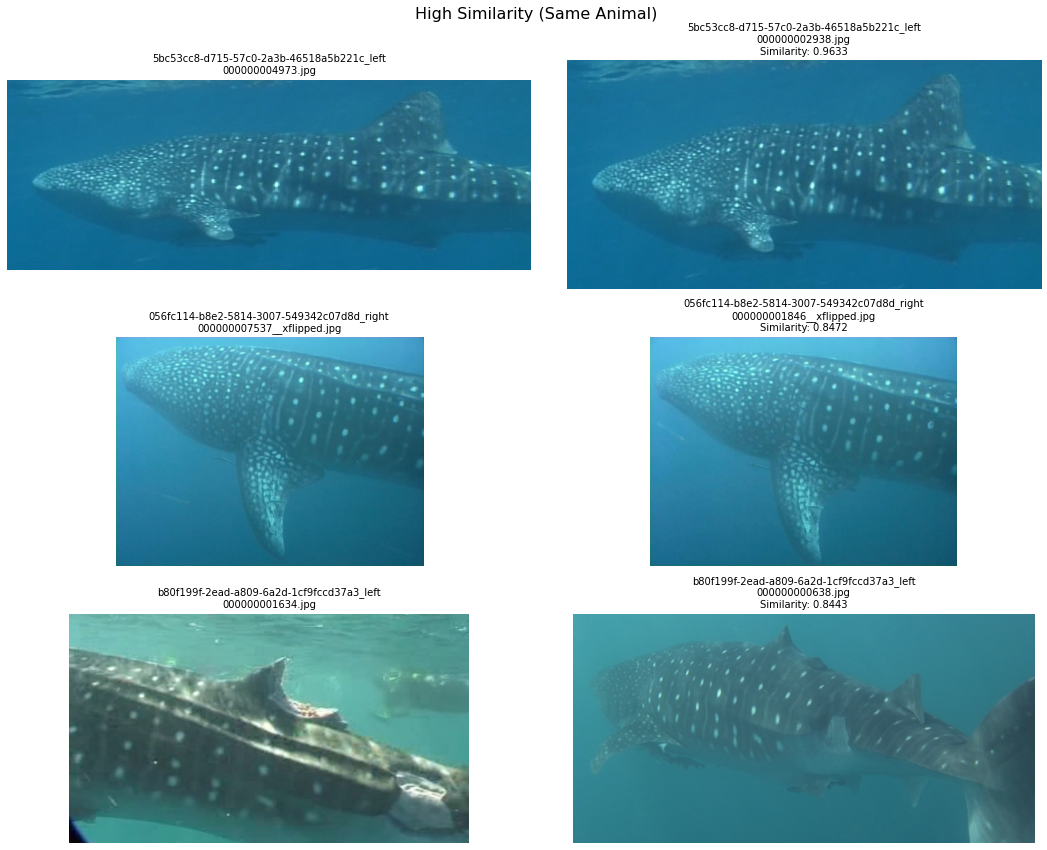


Low Similarity (Same Animal): 3 pairs


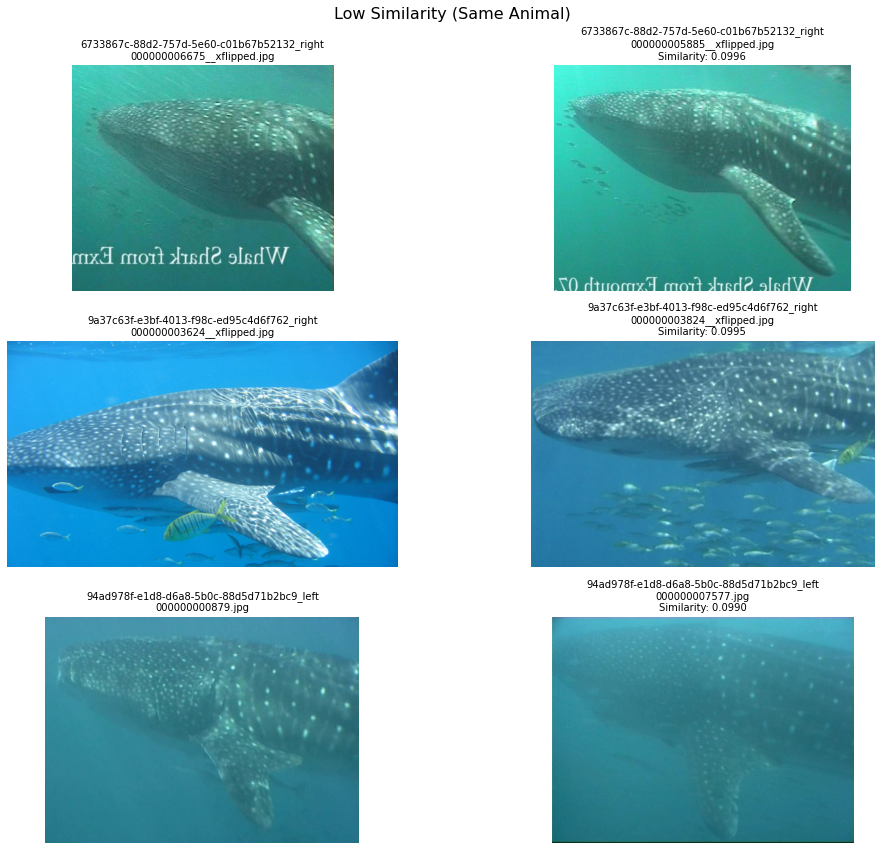


Positive Similarity (Different Animals): 3 pairs


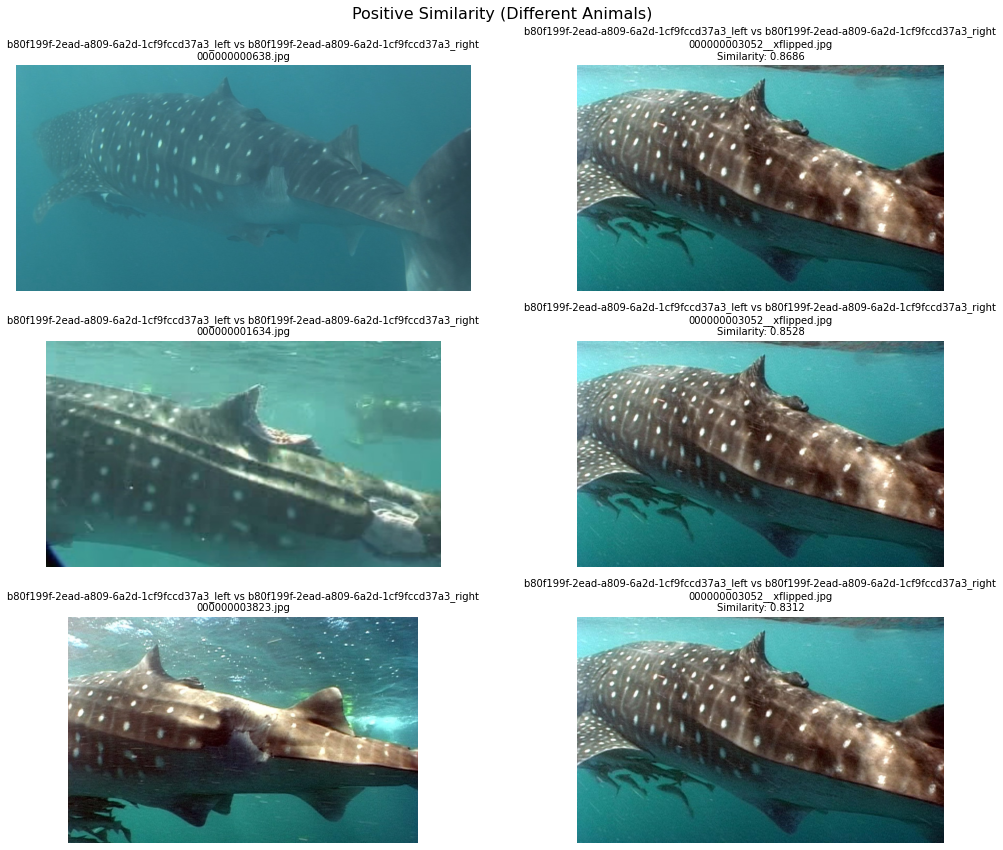


Negative Similarity (Different Animals): 3 pairs


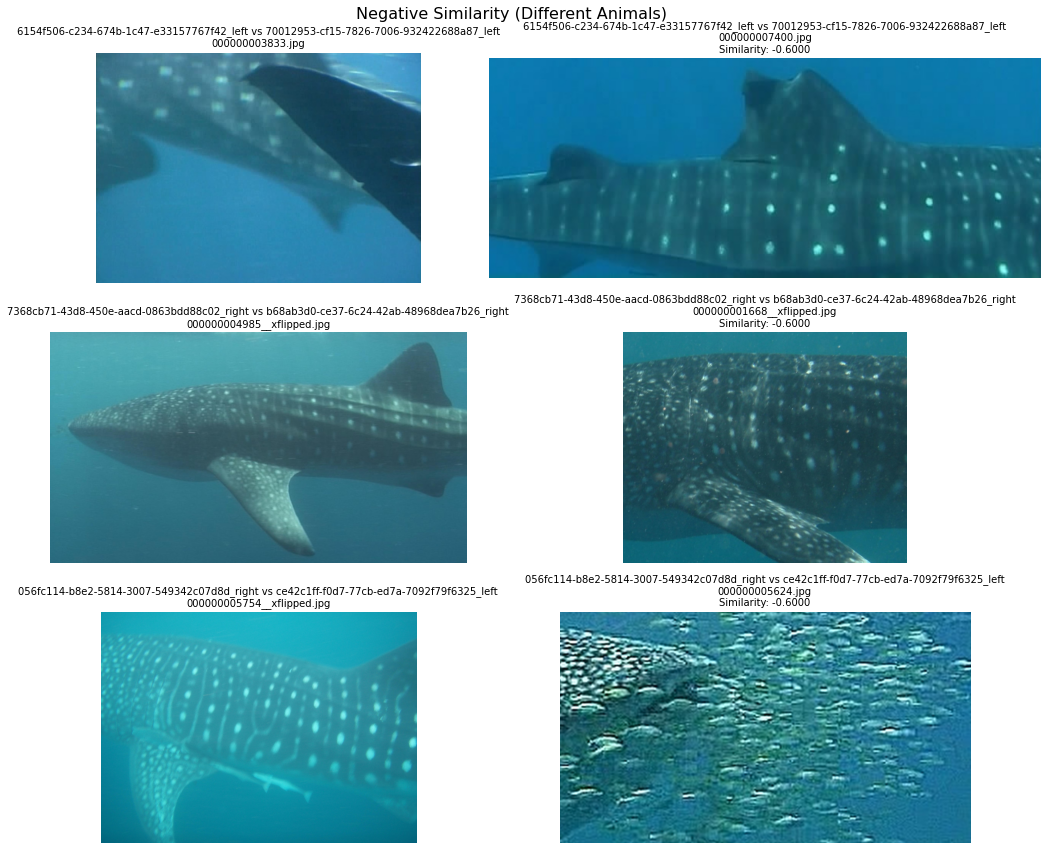

In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image

def find_advanced_pairs(
    embeddings, 
    uuids, 
    uuid_to_name, 
    same_animal_high_threshold=0.8,
    same_animal_low_threshold=0.3,
    diff_animal_positive_threshold=0.2,
    diff_animal_negative_threshold=-0.2
):
    """
    Find various types of similarity pairs between images.
    
    Parameters:
    - embeddings: numpy array of image embeddings
    - uuids: list of unique identifiers corresponding to embeddings
    - uuid_to_name: dictionary mapping UUIDs to animal names
    - same_animal_high_threshold: high similarity threshold for same animal
    - same_animal_low_threshold: low similarity threshold for same animal
    - diff_animal_positive_threshold: positive similarity threshold for different animals
    - diff_animal_negative_threshold: negative similarity threshold for different animals
    
    Returns:
    - Dictionary of different pair types
    """
    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(embeddings)
    similarity_matrix = np.clip(similarity_matrix, -1, 1)

    current_min = similarity_matrix.min()
    current_max = similarity_matrix.max()
    similarity_matrix = 2 * (similarity_matrix - current_min) / (current_max - current_min) - 1

    
    # Initialize pair collections
    pair_types = {
        'same_animal_high': [],
        'same_animal_low': [],
        'diff_animal_positive': [],
        'diff_animal_negative': []
    }
    
    n = len(uuids)
    
    for i in range(n):
        for j in range(i+1, n):
            similarity = similarity_matrix[i, j]
            is_same_animal = uuid_to_name[uuids[i]] == uuid_to_name[uuids[j]]
            
            # Pairs from same animal
            if is_same_animal:
                # High similarity pairs
                if similarity >= same_animal_high_threshold:
                    pair_types['same_animal_high'].append((
                        uuids[i], uuids[j], similarity, uuid_to_name[uuids[i]]
                    ))
                
                # Low similarity pairs
                elif similarity < same_animal_low_threshold:
                    pair_types['same_animal_low'].append((
                        uuids[i], uuids[j], similarity, uuid_to_name[uuids[i]]
                    ))
            
            # Pairs from different animals
            else:
                # Positive similarity
                if similarity > diff_animal_positive_threshold:
                    pair_types['diff_animal_positive'].append((
                        uuids[i], uuids[j], similarity, 
                        f"{uuid_to_name[uuids[i]]} vs {uuid_to_name[uuids[j]]}"
                    ))
                
                # Negative similarity
                elif similarity < diff_animal_negative_threshold:
                    pair_types['diff_animal_negative'].append((
                        uuids[i], uuids[j], similarity, 
                        f"{uuid_to_name[uuids[i]]} vs {uuid_to_name[uuids[j]]}"
                    ))
    
    # Sort pairs by similarity score in descending order for each type
    for key in pair_types:
        pair_types[key].sort(key=lambda x: x[2], reverse=True)
    
    return pair_types

def crop_to_bbox(img, bbox):
    """Helper function to crop image to bounding box"""
    x, y, w, h = bbox
    img_width, img_height = img.size
    
    # Convert relative coordinates to absolute if needed
    if x <= 1 and y <= 1:  # If coordinates are relative
        x = int(x * img_width)
        y = int(y * img_height)
        w = int(w * img_width)
        h = int(h * img_height)
    else:
        x, y, w, h = map(int, [x, y, w, h])
    
    # Ensure coordinates are within image bounds
    x = max(0, x)
    y = max(0, y)
    w = min(w, img_width - x)
    h = min(h, img_height - y)
    
    # Crop image using x, y, width, height format
    cropped_img = img.crop((x, y, x + w, y + h))
    return cropped_img

def plot_advanced_pairs(pair_types, uuid_to_imagepath, uuid_to_bbox, top_n=3):
    """
    Visualize different types of similar image pairs, cropped to their bounding boxes.
    
    Parameters:
    - pair_types: dictionary of pairs from find_advanced_pairs()
    - uuid_to_imagepath: dictionary mapping UUIDs to image paths
    - uuid_to_bbox: dictionary mapping UUIDs to bounding boxes [x, y, width, height]
    - top_n: number of top pairs to plot for each type
    """
    # Pair type labels for plotting
    plot_labels = {
        'same_animal_high': 'High Similarity (Same Animal)',
        'same_animal_low': 'Low Similarity (Same Animal)',
        'diff_animal_positive': 'Positive Similarity (Different Animals)',
        'diff_animal_negative': 'Negative Similarity (Different Animals)'
    }
    
    plt.close('all') 

    
    
    # Process each pair type separately
    for pair_type, pairs in pair_types.items():
        if not pairs:
            continue
            
        top_pairs = pairs[:top_n]
        print(f"\n{plot_labels[pair_type]}: {len(top_pairs)} pairs")
        
        # Create figure for this pair type
        rows = len(top_pairs)
        cols = 2
        fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
        
        # Ensure axes is a 2D array even if only one pair
        if rows == 1:
            axes = axes.reshape(1, -1)
        
        for i, (uuid1, uuid2, similarity, label) in enumerate(top_pairs):
            try:
                # Get image paths and bboxes
                path1 = uuid_to_imagepath.get(uuid1, 'N/A')
                path2 = uuid_to_imagepath.get(uuid2, 'N/A')
                bbox1 = uuid_to_bbox.get(uuid1)
                bbox2 = uuid_to_bbox.get(uuid2)
                
                # Load and crop first image
                img1 = Image.open(path1)
                if bbox1 is not None:
                    img1 = crop_to_bbox(img1, bbox1)
                axes[i, 0].imshow(img1)
                axes[i, 0].axis('off')
                
                # Load and crop second image
                img2 = Image.open(path2)
                if bbox2 is not None:
                    img2 = crop_to_bbox(img2, bbox2)
                axes[i, 1].imshow(img2)
                axes[i, 1].axis('off')
                
                # Set titles
                axes[i, 0].set_title(f'{label}\n{path1.split("/")[-1]}', fontsize=10)
                axes[i, 1].set_title(f'{label}\n{path2.split("/")[-1]}\nSimilarity: {similarity:.4f}', fontsize=10)
            
            except Exception as e:
                print(f"Error processing {pair_type} pair {i+1}: {e}")
                axes[i, 0].text(0.5, 0.5, 'Image 1\nError', ha='center', va='center')
                axes[i, 1].text(0.5, 0.5, 'Image 2\nError', ha='center', va='center')
                axes[i, 0].axis('off')
                axes[i, 1].axis('off')
        
        plt.suptitle(f'{plot_labels[pair_type]}', fontsize=16)
        plt.tight_layout()
        plt.show()
        plt.close(fig)

# Example usage
pair_types = find_advanced_pairs(
    embeddings, 
    uuids, 
    uuid_to_name, 
    same_animal_high_threshold=0.7,
    same_animal_low_threshold=0.1,
    diff_animal_positive_threshold=0.2,
    diff_animal_negative_threshold=-0.6
)

# Print summary of pairs found
for pair_type, pairs in pair_types.items():
    print(f"{pair_type}: {len(pairs)} pairs found")

# Plot the pairs
plot_advanced_pairs(pair_types, uuid_to_imagepath, uuid_to_bbox)

In [7]:
import json
from IPython.display import clear_output
import matplotlib.pyplot as plt

def interactive_annotator(pair_type, uuid_to_imagepath, uuid_to_bbox, annotation_file, negative_file):
    """
    Interactive tool for annotating image pairs.
    
    Parameters:
    - pair_type: one of ['same_animal_high', 'same_animal_low', 'diff_animal_positive', 'diff_animal_negative']
    - uuid_to_imagepath: dictionary mapping UUIDs to image paths
    - uuid_to_bbox: dictionary mapping UUIDs to bounding boxes
    - annotation_file: path to JSON file for positive annotations
    - negative_file: path to JSON file for negative annotations
    """
    # Load existing annotations
    try:
        with open(annotation_file, 'r') as f:
            annotations = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        annotations = []
        

    try:
        with open(negative_file, 'r') as f:
            negatives = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        negatives = []
    
    def save_annotation(data, filename):
        def convert_to_python_types(obj):
            if hasattr(obj, 'item'):  # For numpy types
                return obj.item()
            return obj
        
        # Convert data to regular Python types
        processed_data = []
        for item in data:
            processed_item = {}
            for key, value in item.items():
                processed_item[key] = convert_to_python_types(value)
            processed_data.append(processed_item)
        
        with open(filename, 'w') as f:
            json.dump(processed_data, f, indent=2)
            
    def display_pair(img1_path, img2_path, bbox1=None, bbox2=None):
        plt.close('all')
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Display first image
        img1 = Image.open(img1_path)
        if bbox1 is not None:
            img1 = crop_to_bbox(img1, bbox1)
        ax1.imshow(img1)
        ax1.axis('off')
        ax1.set_title(img1_path.split('/')[-1])
        
        # Display second image
        img2 = Image.open(img2_path)
        if bbox2 is not None:
            img2 = crop_to_bbox(img2, bbox2)
        ax2.imshow(img2)
        ax2.axis('off')
        ax2.set_title(img2_path.split('/')[-1])
        
        plt.tight_layout()
        plt.show()
        
        img1.close()
        img2.close()
    
    def process_pairs(pairs):
        print('process pairs')
        for uuid1, uuid2, similarity, label in pairs:
            # Skip if already annotated
            pair_key = f"{uuid1}_{uuid2}"
            if any(ann.get('pair_id') == pair_key for ann in annotations):
                continue
            if any(neg.get('pair_id') == pair_key for neg in negatives):
                continue
                
            # Get paths and bboxes
            path1 = uuid_to_imagepath.get(uuid1)
            path2 = uuid_to_imagepath.get(uuid2)
            bbox1 = uuid_to_bbox.get(uuid1)
            bbox2 = uuid_to_bbox.get(uuid2)
            
            if not (path1 and path2):
                print(f"Skipping pair - missing paths: {uuid1}, {uuid2}")
                continue
            
            # Display images
            clear_output(wait=True)
            print(f"\nPair type: {pair_type}")
            print(f"Similarity score: {similarity:.4f}")
            print("\nPress:")
            print("'y' - Yes (positive)")
            print("'n' - No (skip)")
            print("'e' - Negative")
            print("'q' - Quit")
            
            display_pair(path1, path2, bbox1, bbox2)
            
            # Get single keypress input
            user_input = input().lower().strip()
            
            if user_input == 'q':
                break
                
            elif user_input == '' or user_input == 'y':
                annotation = {
                    'pair_id': pair_key,
                    'uuid1': uuid1,
                    'uuid2': uuid2,
                    'similarity': float(similarity),  # Convert to regular float
                    'label': label,
                    'pair_type': pair_type
                }
                annotations.append(annotation)
                save_annotation(annotations, annotation_file)
                # No confirmation message, immediately continue to next pair
                
            elif user_input == 'e':
                negative = {
                    'pair_id': pair_key,
                    'uuid1': uuid1,
                    'uuid2': uuid2,
                    'similarity': float(similarity),  # Convert to regular float
                    'label': label,
                    'pair_type': pair_type
                }
                negatives.append(negative)
                save_annotation(negatives, negative_file)
                # No confirmation message, immediately continue to next pair
            
            plt.close('all')
        
    # Start processing
    print(pair_type in pair_types)
    if pair_type in pair_types:
        process_pairs(pair_types[pair_type])
        print("\nAnnotation session completed!")
    else:
        print(f"Invalid pair type. Must be one of: {list(pair_types.keys())}")





Pair type: same_animal_high
Similarity score: 0.7604

Press:
'y' - Yes (positive)
'n' - No (skip)
'e' - Negative
'q' - Quit


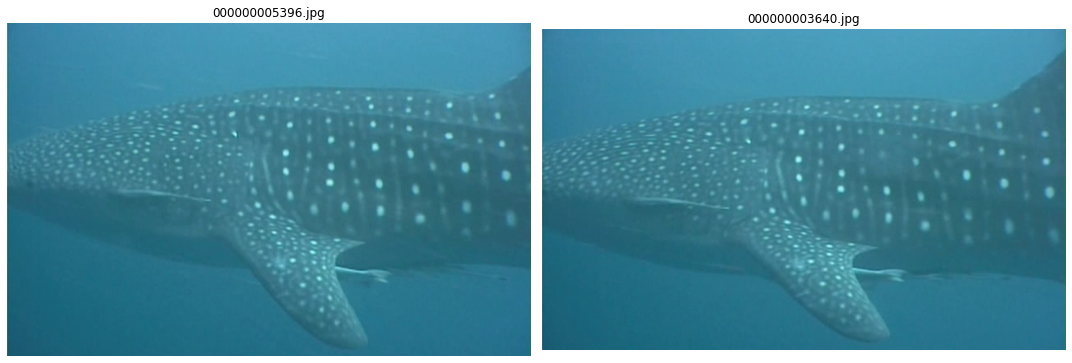

In [ ]:
interactive_annotator(
    pair_type='same_animal_high',
    uuid_to_imagepath=uuid_to_imagepath,
    uuid_to_bbox=uuid_to_bbox,
    annotation_file='high_similarity_annotations.json',
    negative_file='high_similarity_negatives.json'
)

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 